# Customer Lifetime Value Analysis using Python

## Importing libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explporatory Data Analysis

In [11]:
data = pd.read_csv('customer_acquisition_data.csv')
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


There are no missing values in the data

In [5]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [17]:
list(data['channel'].unique())

['referral', 'paid advertising', 'email marketing', 'social media']

There are 4 unique channels - referral, paid advertising, email marketing, social media

## Distribution of numeric variables

Text(0, 0.5, 'Frequency')

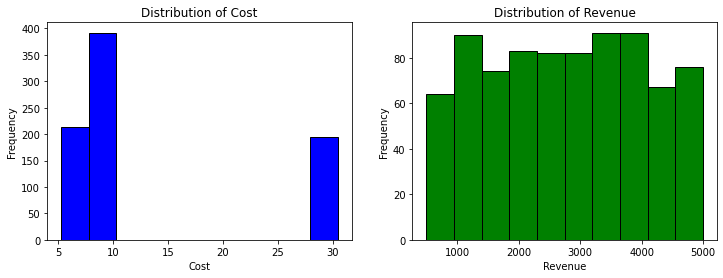

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Distribution of Cost')
ax1.hist(data['cost'], bins=10, color='blue', edgecolor='black')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Frequency')

# Plot histogram for 'revenue'
ax2.set_title('Distribution of Revenue')
ax2.hist(data['revenue'], bins=10, color='green', edgecolor='black')
ax2.set_xlabel('Revenue')
ax2.set_ylabel('Frequency')

## Distribution of Categorical Variables

<AxesSubplot:xlabel='channel', ylabel='count'>

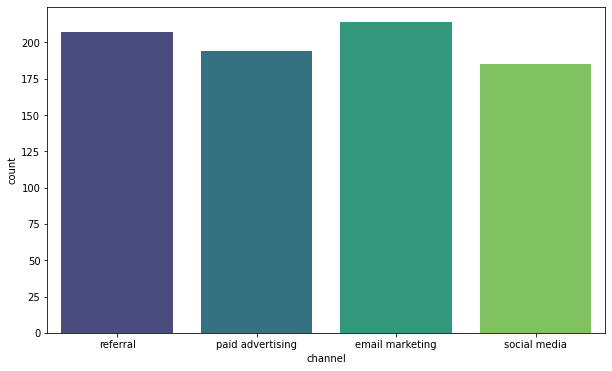

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='channel', palette='viridis')

The counts for each channel appear to be relatively close to each other. This suggests that the customer acquisition efforts were distributed somewhat evenly across these channels.

## Grouping and Aggregating Data

We can aggregate the data by the acquisition channel to analyze the performance of each channel. For example, we can calculate the average ‘cost’, ‘conversion_rate’, and ‘revenue’ for each channel to understand which channels are most effective.

<AxesSubplot:xlabel='channel', ylabel='cost'>

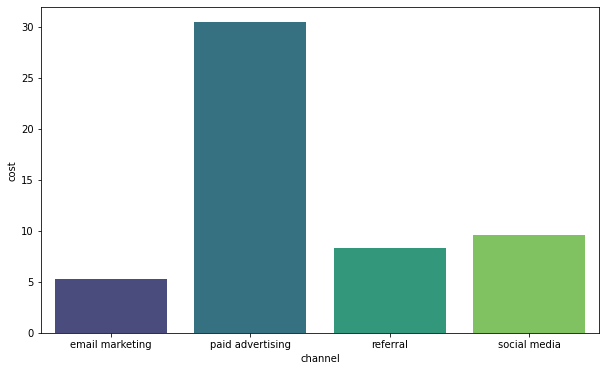

In [43]:
# Grouping the data based on 'channel'
channel_groups = data.groupby('channel')
# Aggregating 'cost' for each channel group
cost_by_channel = channel_groups['cost'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cost_by_channel, x='channel', y='cost', palette='viridis')


From this analysis, we can observe that paid advertising has the highest average cost. On the other hand, social media, email marketing and referrals have relatively lower average costs.

<AxesSubplot:xlabel='channel', ylabel='conversion_rate'>

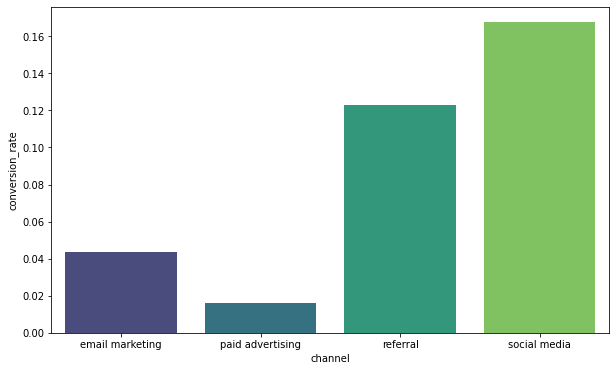

In [48]:
# Aggregating 'conversion_rate' for each channel group
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate_by_channel, x='channel', y='conversion_rate', palette='viridis')

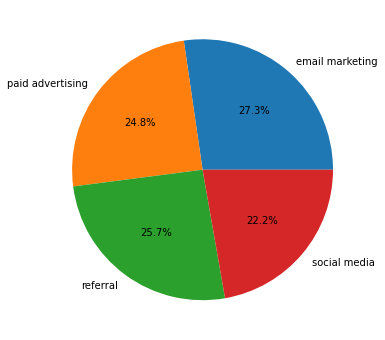

In [49]:
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');

## Return on Investment (ROI)

Return on Investment (ROI) is a financial metric used to evaluate the profitability and efficiency of an investment. It measures the return or gain generated from an investment relative to its cost.

In [50]:
data['roi'] = (data['revenue'] - data['cost']) / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


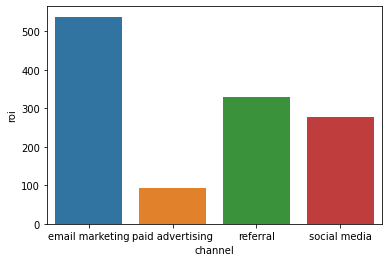

In [52]:
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(data = roi_by_channel, x='channel', y='roi');

## ROI and Other Variables Analysis

<AxesSubplot:>

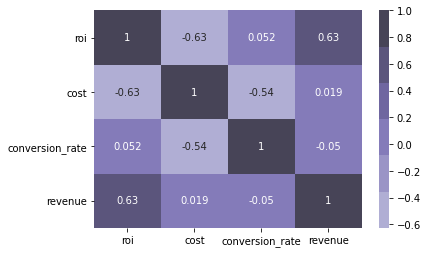

In [53]:
# Computing the correlation matrix
corr = data[['roi', 'cost', 'conversion_rate', 'revenue']].corr()

sns.heatmap(corr, annot=True, cmap=sns.color_palette('Purples_d'))

The correlation matrix suggests that cost and revenue have the strongest relationships with ROI. Higher costs are associated with lower ROI, while higher revenue is associated with higher ROI. The conversion rate alone does not show a significant correlation with ROI.

## Customer Lifetime Value (CLTV)

CLTV (Customer Lifetime Value) analysis is a method used by businesses to estimate the total value a customer will generate over the entire duration of their relationship with the company. It is a valuable metric that helps businesses understand the long-term profitability and worth of their customer base.

In [54]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


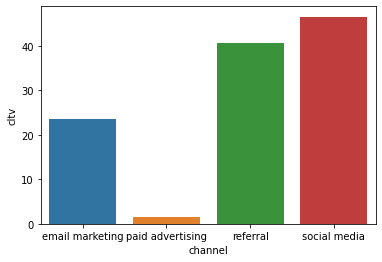

In [56]:
cltv_by_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(data = cltv_by_channel, x='channel', y='cltv');

Based on the analysis, referral and social media channels stand out as the most effective in terms of generating higher customer lifetime value (CLTV). Email marketing also performs reasonably well, while paid advertising lags behind in terms of CLTV

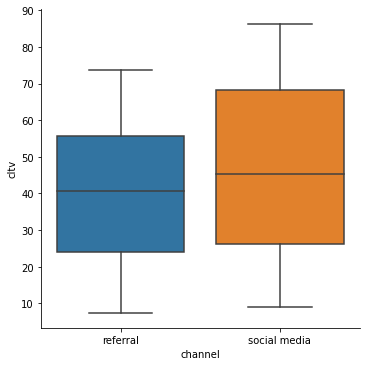

In [58]:
# Selecting records where channel is referral or social media
select = data[data['channel'].isin(['referral', 'social media'])]

sns.catplot(data =select, x='channel', y='cltv', kind='box');

We can see that the social media channel performs the best, but the referral channel is not much worse.